In [170]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [171]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [172]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [173]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Scale the data (excluding the coin_id)
scaled_data = scaler.fit_transform(market_data_df)


In [174]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
# Set the coin_id column as index

# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [175]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []



# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans_model.fit(scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)




# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


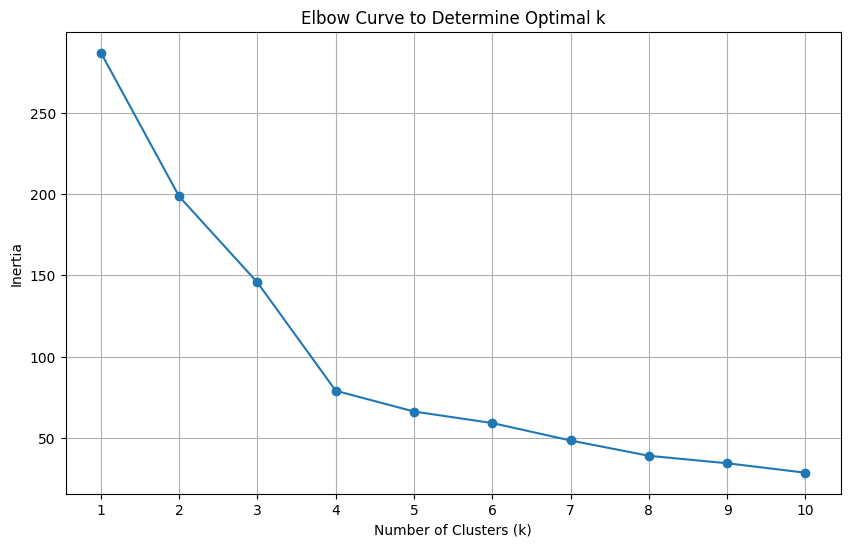

In [176]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:  7**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [177]:
# `best_k` is the best value for k determined from the elbow method.
best_k = 7 

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)


In [178]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)


KMeans(n_clusters=7, random_state=0)

In [179]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(scaled_df)

# View the resulting array of cluster values
print(predicted_clusters)


[2 2 0 0 5 2 5 2 2 0 0 0 0 5 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 4 0 0 1 2 0 6 3
 0 2 0 0]


In [180]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()


In [181]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df['crypto_cluster'] = predicted_clusters

# Display sample data
clustered_df.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,5


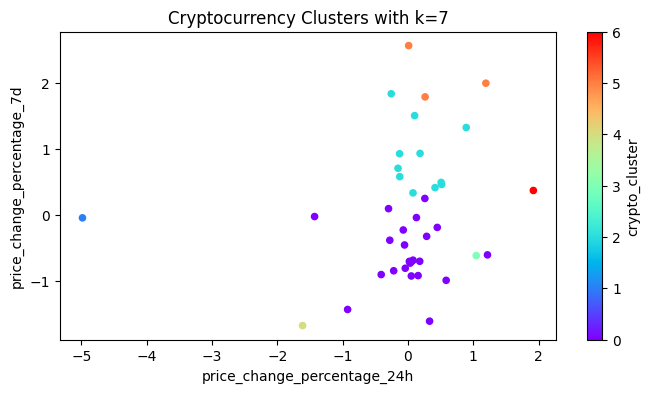

In [182]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='crypto_cluster', 
    colormap='rainbow', 
    figsize=(8, 4),
    colorbar=True
)

plt.title(f'Cryptocurrency Clusters with k={best_k}')
plt.show()




### Optimize Clusters with Principal Component Analysis.

In [183]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [184]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)

pca_data

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [185]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

explained_variance



array([0.3719856 , 0.34700813, 0.17603793])

In [186]:
# Print the total explained variance
print(f"Total Explained Variance: {total_explained_variance}")


Total Explained Variance: 0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:  0.895031657030984** 

In [187]:
# Display sample data

# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = scaled_df.index

# Set the 'coin_id' column as index
pca_df.set_index('coin_id', inplace=True)

# Display the first ten rows of the DataFrame
pca_df.head(10)



,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [188]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using PCA DataFrame.
    kmeans_model.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df



,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


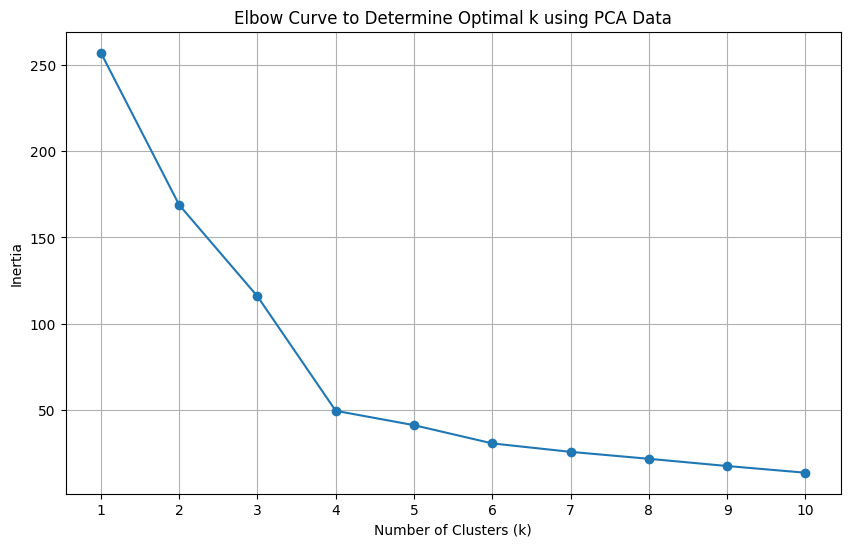

In [189]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve to Determine Optimal k using PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:4** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: best-k value for original data was 7 where the inertia started decreasing slowly. Here, using the PCA data best-k value reached to 4 after which inertia started decreasing slowly for higher k values.** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [190]:
# Initialize the K-Means model using the best value for k
best_k = 4

# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=best_k, random_state=0)



In [191]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)


KMeans(n_clusters=4, random_state=0)

In [192]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values
pca_clusters


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [193]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['crypto_cluster'] = pca_clusters

# Display sample data
pca_clustered_df.head()


,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


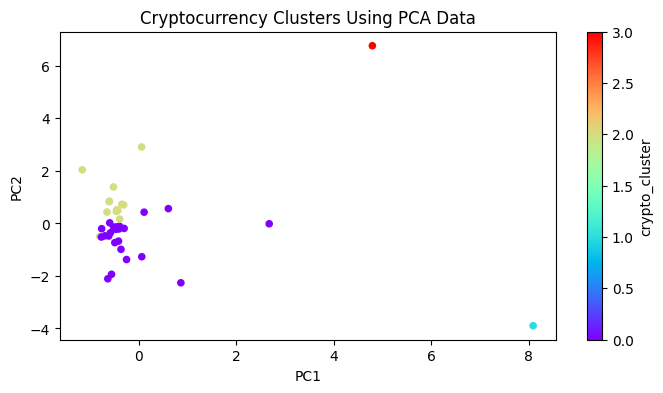

In [194]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_clustered_df.plot.scatter(
    x='PC1',
    y='PC2',
    c='crypto_cluster',
    colormap='rainbow',
    figsize=(8, 4),
    title='Cryptocurrency Clusters Using PCA Data'
)
plt.show()


### Determine the Weights of Each Feature on each Principal Component

In [195]:
# Use the columns from the original scaled DataFrame as the index.

# Use the PCA model's components_ attribute to get the weights (loadings)
pca_components = pd.DataFrame(pca.components_, columns=scaled_df.columns)

# Transpose the DataFrame to use the original feature names as the index
pca_components_transposed = pca_components.T

# Rename the columns to represent the principal components
pca_components_transposed.columns = ['PC1', 'PC2', 'PC3']

# Display the DataFrame to see the weights of each feature on each principal component
pca_components_transposed



,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


In [196]:
# Identify the features with the strongest positive or negative influence on each component
strongest_influences = pca_components_transposed.apply(lambda x: x.abs().idxmax())
print("\nFeatures with the strongest influence on each principal component:")
strongest_influences



Features with the strongest influence on each principal component:


PC1    price_change_percentage_200d
PC2     price_change_percentage_30d
PC3      price_change_percentage_7d
dtype: object

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:      price_change_percentage_200d,   price_change_percentage_30d and price_change_percentage_7d** 
    